In [2]:
# import the necessary packages
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
plt.rcParams['figure.figsize'] = (5, 3) # set default figure size
import flopy as fp  # import flopy and call it fp
import glob
import imageio
import IPython
import datetime

### run varrying parameters in `vary_params.py` 
#### vary K & porosity

In [38]:
files = glob.glob(r'output/model_output_2024-01-31*.txt')
load_arr = np.loadtxt(files[-1],delimiter=",")
print(f'using latest {files[-1]}')
load_arr[:]

using latest output\model_output_2024-01-31 08_23.txt


array([[87.25806452, 87.41935484, 87.41935484, 87.41935484, 87.41935484,
        87.41935484, 87.41935484, 87.41935484, 87.41935484, 87.41935484],
       [99.83870968, 99.83870968, 99.83870968, 99.83870968, 99.83870968,
        99.83870968, 99.83870968, 99.83870968, 99.83870968, 99.83870968],
       [99.83870968, 99.83870968, 99.83870968, 99.83870968, 99.83870968,
        99.83870968, 99.83870968, 99.83870968, 99.83870968, 99.83870968],
       [42.58064516, 42.74193548, 42.74193548, 42.74193548, 42.74193548,
        42.74193548, 42.74193548, 42.74193548, 42.74193548, 42.74193548],
       [72.58064516, 74.19354839, 74.19354839, 74.19354839, 74.19354839,
        74.19354839, 74.19354839, 74.19354839, 74.19354839, 74.19354839],
       [98.22580645, 99.83870968, 99.83870968, 99.83870968, 99.83870968,
        99.83870968, 99.83870968, 99.83870968, 99.83870968, 99.83870968],
       [23.06451613, 23.38709677, 23.38709677, 23.38709677, 23.38709677,
        23.38709677, 23.38709677, 23.38709677

In [39]:
# files = glob.glob(r'output/parameter_output_2024-01-08*.txt')
files = glob.glob(r'output/parameter_output_2024-01-31*.txt')
load_params = np.loadtxt(files[-1],delimiter=",")
n_kh_vals = 3
kh_var = load_params[:n_kh_vals]
npor_var = load_params[n_kh_vals:]

In [40]:
npor_var

array([0.2 , 0.35, 0.5 ])

In [41]:
Q_d = 40_000 # m^3/y
Q_tot = Q_d * 1.25
n_years = 10
cycle_n = np.arange(0, n_years,1)
cycle_n_arr = np.array(cycle_n) + 1

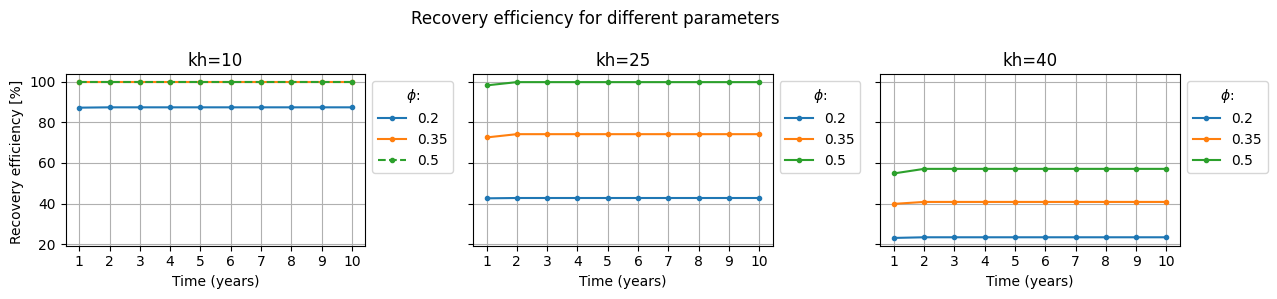

In [42]:
n = 0
fname = r'figures/recovery_Q_vary_k_npor.png'
fig, ax = plt.subplots(1,3,figsize=(12,3),sharey=True, sharex=True)
fig.suptitle("Recovery efficiency for different parameters")
axs = ax.flatten()
for i in range(len(kh_var)):
    # axs[i].axhline(Q_d,ls="--",color="k",label="$V_d$")
    if i in [0]: axs[i].set_ylabel("Recovery efficiency [%] ")
    if i in [0,1,2]: axs[i].set_xlabel(r"Time (years)")
    axs[i].set_title(f"kh={int(kh_var[i])}")
    axs[i].set_xticks(ticks=cycle_n_arr)
    axs[i].grid()
    cycle_n_arr = np.array(cycle_n) + 1
    for j in range(len(npor_var)):
        if i in [0] and j in [2]: ls="--" 
        else: ls = "-"
        axs[i].plot(cycle_n_arr,load_arr[n,:],marker=".",label=f"{npor_var[j]}",ls=ls)
        axs[i].legend(bbox_to_anchor=(1,1),title=r"$\phi$:")
        n+=1
fig.tight_layout()
plt.savefig(fname,bbox_inches="tight")
    # plt.close()

#### vary alpha_L

In [32]:
files = glob.glob(r'output/model_alphaL_output_2024-01-31*.txt')
load_arr = np.loadtxt(files[-1],delimiter=",")
print(f'using latest {files[-1]}')
load_arr[0,:]

using latest output\model_alphaL_output_2024-01-31 03_14.txt


array([72.58064516, 74.19354839, 74.19354839, 74.19354839, 74.19354839,
       74.19354839, 74.19354839, 74.19354839, 74.19354839, 74.19354839])

In [34]:
files = glob.glob(r'output/parameter_alphaL_output_2024-01-31*.txt')
load_params = np.loadtxt(files[-1],delimiter=",")
alphaL_var = load_params[:]
alphaL_var

array([0.5 , 1.25, 2.  ])

In [35]:
Q_d = 40_000 # m^3/y
Q_tot = Q_d * 1.25
cycle_n = np.arange(0, 10,1)
cycle_n_arr = np.array(cycle_n) + 1

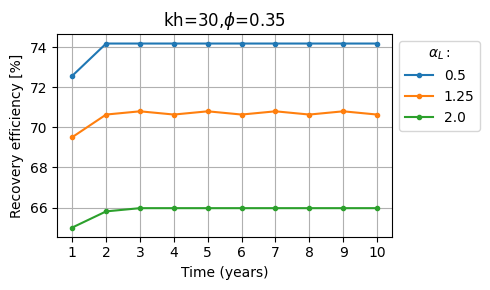

In [36]:
n = 0
fname = r'figures/recovery_Q_vary_alpha_L.png'
fig, ax = plt.subplots(1,figsize=(5,3),sharey=True, sharex=True)
# fig.suptitle("Recovery volume for different parameters")
axs = [ax]
i = 0
axs[i].set_ylabel("Recovery efficiency [%]")
axs[i].set_xlabel(r"Time (years)")
axs[i].set_title(fr"kh=30,$\phi$=0.35")
axs[i].set_xticks(ticks=cycle_n_arr)
axs[i].grid()
for j in range(len(alphaL_var)):
    cycle_n_arr = np.array(cycle_n) + 1
    axs[i].plot(cycle_n_arr,load_arr[n,:],marker=".",label=f"{alphaL_var[j]}")
    n+=1
axs[i].legend(bbox_to_anchor=(1,1),title=r"$\alpha_L:$")
fig.tight_layout()
plt.savefig(fname,bbox_inches="tight")
    # plt.close()